In [7]:
def pair_sum(arr,k):

    if len(arr)<2:
        return

    # Sets for tracking
    seen = set()
    output = set()

    # For every number in array
    for num in arr:

        # Set target difference
        target = k-num

        # Add it to set if target hasn't been seen
        if target not in seen:
            seen.add(num)

        else:
            # Add a tuple with the corresponding pair
            output.add( (min(num,target),  max(num,target)) )


    # FOR TESTING
    return len(output)
    # Nice one-liner for printing output
    #return '\n'.join(map(str,list(output)))
print(pair_sum([1,3,2,2],4))


"""
RUN THIS CELL TO TEST YOUR SOLUTION
"""
#from nose.tools import assert_equal

class TestPair(object):

    def test(self,sol):
        print(sol([1,9,2,8,3,7,4,6,5,5,13,14,11,13,-1],10),6)
        print(sol([1,2,3,1],3),1)
        print(sol([1,3,2,2],4),2)
        print('ALL TEST CASES PASSED')

#Run tests
t = TestPair()
t.test(pair_sum)

2
6 6
1 1
2 2
ALL TEST CASES PASSED


In [10]:
def anagram(s1,s2):

    # Remove spaces and lowercase letters
    s1 = s1.replace(' ','').lower()
    s2 = s2.replace(' ','').lower()

    # Return boolean for sorted match.
    return sorted(s1) == sorted(s2)
anagram('dog','god')
anagram('clint eastwood','old west action')
anagram('aa','bb')

class AnagramTest(object):

    def test(self,sol):
        print(sol('go go go','gggooo'),True)
        print(sol('abc','cba'),True)
        print(sol('hi man','hi     man'),True)
        print(sol('aabbcc','aabbc'),False)
        print(sol('123','1 2'),False)
        print("ALL TEST CASES PASSED")

# Run Tests
t = AnagramTest()
t.test(anagram)

True True
True True
True True
False False
False False
ALL TEST CASES PASSED


In [11]:
def finder(arr1,arr2):

    # Sort the arrays
    arr1.sort()
    arr2.sort()

    # Compare elements in the sorted arrays
    for num1, num2 in zip(arr1,arr2):
        if num1!= num2:
            return num1

    # Otherwise return last element
    return arr1[-1]
arr1 = [1,2,3,4,5,6,7]
arr2 = [3,7,2,1,4,6]
finder(arr1,arr2)

5

In [13]:
def finder3(arr1, arr2):
    result=0

    # Perform an XOR between the numbers in the arrays
    for num in arr1+arr2:
        result^=num
        print(result)

    return result
finder3(arr1,arr2)

5
0
7
0
5
2
5


5

In [14]:
class TestFinder(object):

    def test(self,sol):
        print(sol([5,5,7,7],[5,7,7]),5)
        print(sol([1,2,3,4,5,6,7],[3,7,2,1,4,6]),5)
        print(sol([9,8,7,6,5,4,3,2,1],[9,8,7,5,4,3,2,1]),6)
        print('ALL TEST CASES PASSED')

# Run test
t = TestFinder()
t.test(finder)

5 5
5 5
6 6
ALL TEST CASES PASSED


In [15]:
def large_cont_sum(arr):

    # Check to see if array is length 0
    if len(arr)==0:
        return 0

    # Start the max and current sum at the first element
    max_sum=current_sum=arr[0]

    # For every element in array
    for num in arr[1:]:

        # Set current sum as the higher of the two
        current_sum=max(current_sum+num, num)

        # Set max as the higher between the currentSum and the current max
        max_sum=max(current_sum, max_sum)

    return max_sum
large_cont_sum([1,2,-1,3,4,10,10,-10,-1])

29

In [17]:
class LargeContTest(object):
    def test(self,sol):
        print(sol([1,2,-1,3,4,-1]),9)
        print(sol([1,2,-1,3,4,10,10,-10,-1]),29)
        print(sol([-1,1]),1)
        print('ALL TEST CASES PASSED')

#Run Test
t = LargeContTest()
t.test(large_cont_sum)

9 9
29 29
1 1
ALL TEST CASES PASSED


In [18]:
def rev_word1(s):
    return " ".join(reversed(s.split()))

#Or

def rev_word2(s):
    return " ".join(s.split()[::-1])
rev_word1('Hi John,   are you ready to go?')

rev_word2('Hi John,   are you ready to go?')

'go? to ready you are John, Hi'

In [21]:
def rev_word3(s):
    """
    Manually doing the splits on the spaces.
    """

    words = []
    length = len(s)
    spaces = [' ']

    # Index Tracker
    i = 0

    # While index is less than length of string
    while i < length:

        # If element isn't a space
        if s[i] not in spaces:

            # The word starts at this index
            word_start = i

            while i < length and s[i] not in spaces:

                # Get index where word ends
                i += 1
            # Append that word to the list
            words.append(s[word_start:i])
        # Add to index
        i += 1

    # Join the reversed words
    return " ".join(reversed(words))

class ReversalTest(object):

      def test(self,sol):
          print(sol('    space before'),'before space')
          print(sol('space after     '),'after space')
          print(sol('   Hello John    how are you   '),'you are how John Hello')
          print(sol('1'),'1')
          print("ALL TEST CASES PASSED")

# Run and test
t = ReversalTest()
t.test(rev_word3)

before space before space
after space after space
you are how John Hello you are how John Hello
1 1
ALL TEST CASES PASSED


In [23]:
def compress(s):
    """
    This solution compresses without checking. Known as the RunLength Compression algorithm.
    """

    # Begin Run as empty string
    r = ""
    l = len(s)

    # Check for length 0
    if l == 0:
        return ""

    # Check for length 1
    if l == 1:
        return s + "1"

    #Intialize Values
    last = s[0]
    cnt = 1
    i = 1

    while i < l:

        # Check to see if it is the same letter
        if s[i] == s[i - 1]:
            # Add a count if same as previous
            cnt += 1
        else:
            # Otherwise store the previous data
            r = r + s[i - 1] + str(cnt)
            cnt = 1

        # Add to index count to terminate while loop
        i += 1

    # Put everything back into run
    r = r + s[i - 1] + str(cnt)

    return r

class TestCompress(object):

    def test(self, sol):
        print(sol(''), '')
        print(sol('AABBCC'), 'A2B2C2')
        print(sol('AAABCCDDDDD'), 'A3B1C2D5')
        print('ALL TEST CASES PASSED')

# Run Tests
t = TestCompress()
t.test(compress)

 
A2B2C2 A2B2C2
A3B1C2D5 A3B1C2D5
ALL TEST CASES PASSED


In [25]:
def uni_char(s):
    return len(set(s)) == len(s)
def uni_char2(s):
    chars = set()
    for let in s:
        # Check if in set
        if let in chars:
            return False
        else:
            #Add it to the set
            chars.add(let)
    return True

class TestUnique(object):

    def test(self, sol):
        print(sol(''), True)
        print(sol('goo'), False)
        print(sol('abcdefg'), True)
        print('ALL TEST CASES PASSED')

# Run Tests
t = TestUnique()
t.test(uni_char)

True True
False False
True True
ALL TEST CASES PASSED


In [26]:
class Stack(object):

    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        return self.items.pop()

    def peek(self):
        return self.items[len(self.items)-1]

    def size(self):
        return len(self.items)

In [27]:
class Queue:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def enqueue(self, item):
        self.items.insert(0,item)

    def dequeue(self):
        return self.items.pop()

    def size(self):
        return len(self.items)

In [28]:
class Deque:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def addFront(self, item):
        self.items.append(item)

    def addRear(self, item):
        self.items.insert(0,item)

    def removeFront(self):
        return self.items.pop()

    def removeRear(self):
        return self.items.pop(0)

    def size(self):
        return len(self.items)

In [29]:
def balance_check(s):

    # Check is even number of brackets
    if len(s)%2 != 0:
        return False

    # Set of opening brackets
    opening = set('([{')

    # Matching Pairs
    matches = set([ ('(',')'), ('[',']'), ('{','}') ])

    # Use a list as a "Stack"
    stack = []

    # Check every parenthesis in string
    for paren in s:

        # If its an opening, append it to list
        if paren in opening:
            stack.append(paren)

        else:

            # Check that there are parentheses in Stack
            if len(stack) == 0:
                return False

            # Check the last open parenthesis
            last_open = stack.pop()

            # Check if it has a closing match
            if (last_open,paren) not in matches:
                return False

    return len(stack) == 0
balance_check('[]')

class TestBalanceCheck(object):

    def test(self,sol):
        print(sol('[](){([[[]]])}('),False)
        print(sol('[{{{(())}}}]((()))'),True)
        print(sol('[[[]])]'),False)
        print('ALL TEST CASES PASSED')

# Run Tests

t = TestBalanceCheck()
t.test(balance_check)

False False
True True
False False
ALL TEST CASES PASSED


In [30]:
class Queue2Stacks(object):

    def __init__(self):

        # Two Stacks
        self.instack = []
        self.outstack = []

    def enqueue(self,element):

        # Add an enqueue with the "IN" stack
        self.instack.append(element)

    def dequeue(self):
        if not self.outstack:
            while self.instack:
                # Add the elements to the outstack to reverse the order when called
                self.outstack.append(self.instack.pop())
        return self.outstack.pop()

q = Queue2Stacks()

for i in range(5):
    q.enqueue(i)

for i in range(5):
    print(q.dequeue())

0
1
2
3
4


In [38]:
class Node(object):

    def __init__(self,value):

        self.value = value
        self.nextnode = None
    def reverse(head):

        # Set up current,previous, and next nodes
        current = head
        previous = None
        nextnode = None

        # until we have gone through to the end of the list
        while current:

            # Make sure to copy the current nodes next node to a variable next_node
            # Before overwriting as the previous node for reversal
            nextnode = current.nextnode

            # Reverse the pointer ot the next_node
            current.nextnode = previous

            # Go one forward in the list
            previous = current
            current = nextnode

        return previous

# Create a list of 4 nodes
a = Node(1)
b = Node(2)
c = Node(3)
d = Node(4)

# Set up order a,b,c,d with values 1,2,3,4
a.nextnode = b
b.nextnode = c
c.nextnode = d

print(a.nextnode.value)
print(b.nextnode.value)
print(c.nextnode.value)

2
3
4


In [41]:
class Node(object):

    def __init__(self,value):

        self.value = value
        self.nextnode = None

    def cycle_check(node):

      # Begin both markers at the first node
      marker1 = node
      marker2 = node

      # Go until end of list
      while marker2 != None and marker2.nextnode != None:

          # Note
          marker1 = marker1.nextnode
          marker2 = marker2.nextnode.nextnode

          # Check if the markers have matched
          if marker2 == marker1:
              return True

      # Case where marker ahead reaches the end of the list
      return False

# CREATE CYCLE LIST
a = Node(1)
b = Node(2)
c = Node(3)

a.nextnode = b
b.nextnode = c
c.nextnode = a # Cycle Here!


# CREATE NON CYCLE LIST
x = Node(1)
y = Node(2)
z = Node(3)

x.nextnode = y
y.nextnode = z


#############
class TestCycleCheck(object):

    def test(self,sol):
        print(sol(a),True)
        print(sol(x),False)

        print("ALL TEST CASES PASSED")

# Run Tests

t = TestCycleCheck()
t.test(cycle_check)

True True
False False
ALL TEST CASES PASSED


In [48]:
class LinkedListNode(object):

    def __init__(self,value):

        self.value = value
        self.nextnode = None
a = LinkedListNode(1)
b = LinkedListNode(2)
c = LinkedListNode(3)
a.nextnode = b
b.nextnode = c

class DoublyLinkedListNode(object):

    def __init__(self,value):

        self.value = value
        self.next_node = None
        self.prev_node = None
a = DoublyLinkedListNode(1)
b = DoublyLinkedListNode(2)
c = DoublyLinkedListNode(3)
# Setting b after a
b.prev_node = a
a.next_node = b
# Setting c after a
b.next_node = c
c.prev_node = b

In [49]:
def func_quad(lst):
    '''
    Prints pairs for every item in list.
    '''
    for item_1 in lst:
        for item_2 in lst:
            print(item_1,item_2)

lst = [0, 1, 2, 3]

func_quad(lst)

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3


Text(0.5, 0, 'n')

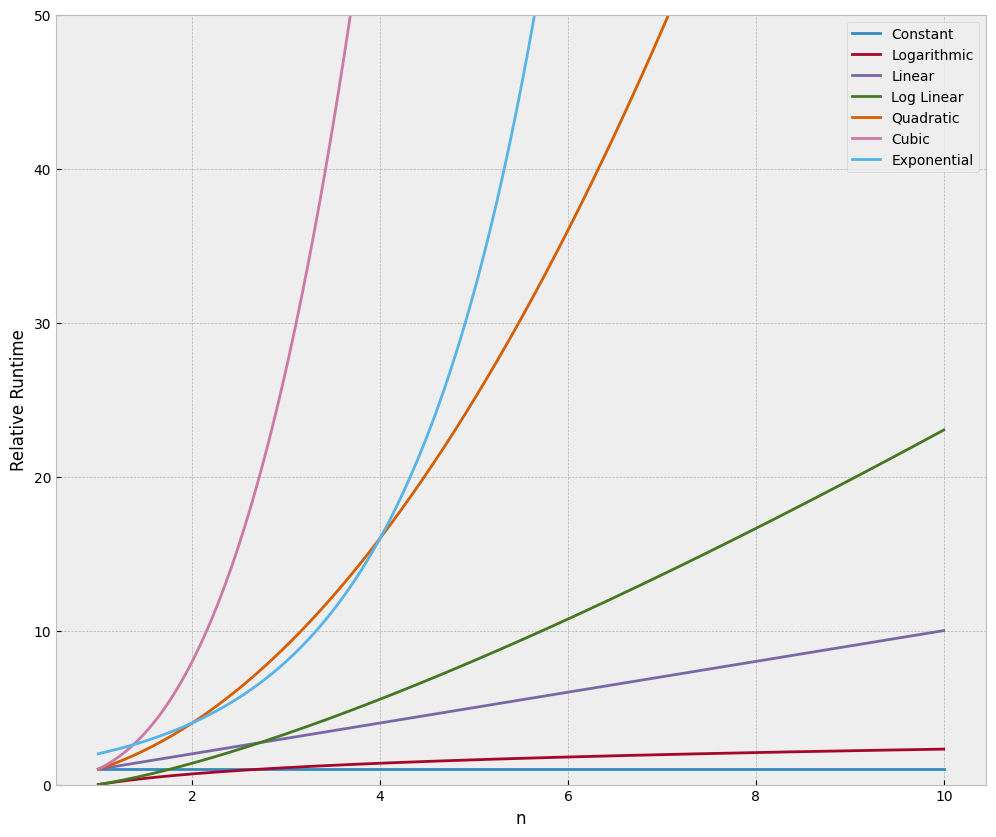

In [51]:
from math import log
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Set up runtime comparisons
n = np.linspace(1,10,1000)
labels = ['Constant','Logarithmic','Linear','Log Linear','Quadratic','Cubic','Exponential']
big_o = [np.ones(n.shape),np.log(n),n,n*np.log(n),n**2,n**3,2**n]

# Plot setup
plt.figure(figsize=(12,10))
plt.ylim(0,50)

for i in range(len(big_o)):
    plt.plot(n,big_o[i],label = labels[i])


plt.legend(loc=0)
plt.ylabel('Relative Runtime')
plt.xlabel('n')



In [53]:
def reverse(s):

    # Base Case
    if len(s) <= 1:
        return s

    # Recursion
    return reverse(s[1:]) + s[0]

class TestReverse(object):

    def test_rev(self,solution):
        print(solution('hello'),'olleh')
        print(solution('hello world'),'dlrow olleh')
        print(solution('123456789'),'987654321')

        print('PASSED ALL TEST CASES!')

# Run Tests
test = TestReverse()
test.test_rev(reverse)

olleh olleh
dlrow olleh dlrow olleh
987654321 987654321
PASSED ALL TEST CASES!


In [55]:
def permute(s):
    out = []

    # Base Case
    if len(s) == 1:
        out = [s]

    else:
        # For every letter in string
        for i, let in enumerate(s):

            # For every permutation resulting from Step 2 and 3 described above
            for perm in permute(s[:i] + s[i+1:]):

                # Add it to output
                out += [let + perm]

    return out
permute('abc')

class TestPerm(object):

    def test(self,solution):

        print(sorted(solution('abc')),sorted(['abc', 'acb', 'bac', 'bca', 'cab', 'cba']))
        print(sorted(solution('dog')),sorted(['dog', 'dgo', 'odg', 'ogd', 'gdo', 'god']) )

        print('All test cases passed.')



# Run Tests
t = TestPerm()
t.test(permute)

['abc', 'acb', 'bac', 'bca', 'cab', 'cba'] ['abc', 'acb', 'bac', 'bca', 'cab', 'cba']
['dgo', 'dog', 'gdo', 'god', 'odg', 'ogd'] ['dgo', 'dog', 'gdo', 'god', 'odg', 'ogd']
All test cases passed.


In [56]:
def fib_rec(n):

    # Base Case
    if n == 0 or n == 1:
        return n

    # Recursion
    else:
        return fib_rec(n-1) + fib_rec(n-2)
fib_rec(10)



55

In [57]:
# Instantiate Cache information
n = 10
cache = [None] * (n + 1)


def fib_dyn(n):

    # Base Case
    if n == 0 or n == 1:
        return n

    # Check cache
    if cache[n] != None:
        return cache[n]

    # Keep setting cache
    cache[n] = fib_dyn(n-1) + fib_dyn(n-2)

    return cache[n]
fib_dyn(10)

55

In [58]:
def fib_iter(n):

    # Set starting point
    a = 0
    b = 1

    # Follow algorithm
    for i in range(n):

        a, b = b, a + b

    return a
fib_iter(23)

28657

In [60]:
class TestFib(object):

    def test(self,solution):
        print(solution(10),55)
        print(solution(1),1)
        print(solution(23),28657)
        print('Passed all tests.')
# UNCOMMENT FOR CORRESPONDING FUNCTION
t = TestFib()

t.test(fib_rec)
#t.test(fib_dyn) # Note, will need to reset cache size for each test!
#t.test(fib_iter)

55 55
1 1
28657 28657
Passed all tests.


In [61]:
def rec_coin(target,coins):
    '''
    INPUT: Target change amount and list of coin values
    OUTPUT: Minimum coins needed to make change

    Note, this solution is not optimized.
    '''

    # Default to target value
    min_coins = target

    # Check to see if we have a single coin match (BASE CASE)
    if target in coins:
        return 1

    else:

        # for every coin value that is <= than target
        for i in [c for c in coins if c <= target]:

            # Recursive Call (add a count coin and subtract from the target)
            num_coins = 1 + rec_coin(target-i,coins)

            # Reset Minimum if we have a new minimum
            if num_coins < min_coins:

                min_coins = num_coins

    return min_coins


rec_coin(63,[1,5,10,25])

6